# Linear Regression

In [20]:
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
import numpy as np
from sklearn import linear_model

In [7]:
df = pd.read_csv("../Exec1 - Regression/FuelConsumptionCo2.csv")

In [10]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
cdf = df[['ENGINESIZE','CO2EMISSIONS']]

# Plotting cdf data

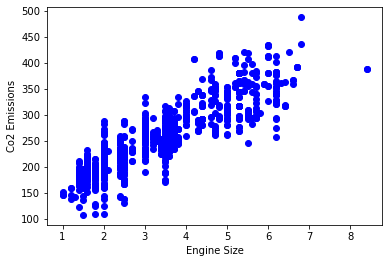

In [16]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue") 
plt.xlabel("Engine Size") 
plt.ylabel("Co2 Emissions") 
plt.show()

# Train-Test Data Creation

In [21]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

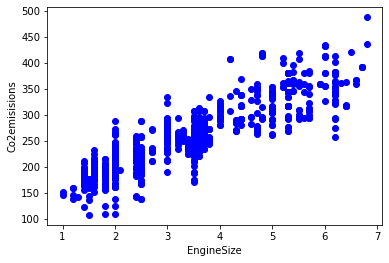

In [22]:
# plotting train datasets
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
plt.xlabel("EngineSize")
plt.ylabel("Co2emisisions")
plt.show()


# Applying Simple Linear Regression

In [23]:
# from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

LinearRegression()

In [26]:
regr.coef_, regr.intercept_

(array([[39.82890781]]), array([122.45019515]))

# Plotting Line on the data

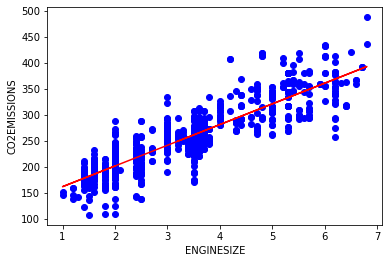

In [27]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

# Prediction "test_y_hat" from "test_x" using "regr" model

In [29]:
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_hat = regr.predict(test_x)

# Calculating Errors

In [30]:
# mean absolute error
np.mean(np.absolute(test_y_hat - test_y))

26.187183552479077

In [31]:
# mean squared erroe
np.mean((test_y_hat - test_y)**2)

1087.0978567426373

In [32]:
# calculating R2 score
from sklearn.metrics import r2_score

r2_score(test_y_hat, test_y)

0.6725183032574438

In [49]:
#printing test_y and test_y_hat side bt side
#print([(test_y[i][0], test_y_hat[i][0]) for i in range(test_y.size)])
for i in range(test_y.size):
    print(test_y[i], "---", test_y_hat[i])
    

[221] --- [218.03957389]
[255] --- [269.81715403]
[354] --- [309.64606184]
[230] --- [202.10801076]
[224] --- [241.93691857]
[224] --- [241.93691857]
[260] --- [281.76582638]
[242] --- [202.10801076]
[304] --- [241.93691857]
[409] --- [329.56051574]
[336] --- [289.73160794]
[306] --- [289.73160794]
[290] --- [281.76582638]
[285] --- [241.93691857]
[292] --- [241.93691857]
[209] --- [202.10801076]
[322] --- [281.76582638]
[380] --- [361.42364199]
[202] --- [202.10801076]
[221] --- [241.93691857]
[232] --- [241.93691857]
[193] --- [202.10801076]
[209] --- [202.10801076]
[221] --- [241.93691857]
[228] --- [241.93691857]
[246] --- [241.93691857]
[281] --- [297.6973895]
[292] --- [297.6973895]
[292] --- [297.6973895]
[317] --- [297.6973895]
[338] --- [297.6973895]
[230] --- [202.10801076]
[274] --- [241.93691857]
[324] --- [297.6973895]
[253] --- [241.93691857]
[278] --- [241.93691857]
[218] --- [218.03957389]
[221] --- [202.10801076]
[235] --- [202.10801076]
[207] --- [222.02246467]
[260] 